In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
import os
import tensorflow as tf
import keras
import cv2
import numpy as np # linear algebra
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model
from tensorflow.keras import layers , models, optimizers

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import *

In [4]:
img_shape = 48
batch_size = 64
train_data_path = '../input/fer2013/train/'
test_data_path = '../input/fer2013/test/'

(48, 48, 3)

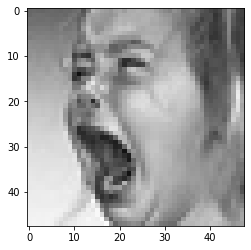

In [7]:
#ANGRY

img=cv2.imread('../input/fer2013/train/angry/Training_10290703.jpg')
plt.imshow(img)
img.shape

In [5]:
train_gen = ImageDataGenerator(
        rescale= 1 / 255,
        # Data Augmentation
        rotation_range=10,
        zoom_range= 0.2,
        width_shift_range= 0.1,
        height_shift_range= 0.1,
        fill_mode ="nearest"
    
    )

test_gen = ImageDataGenerator(rescale= 1 / 255 )


In [6]:
train_data = train_gen.flow_from_directory(
    train_data_path,
    class_mode="categorical",
    target_size=(img_shape,img_shape),
    color_mode='rgb', 
    shuffle=True,
    batch_size=batch_size,
    subset='training', 
)


test_data = test_gen.flow_from_directory(
    test_data_path,
    class_mode="categorical",
    target_size=(img_shape,img_shape),
    color_mode="rgb",
    shuffle=False,
    batch_size=batch_size,
)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [7]:
def Create_CNN_Model():
    
    model = Sequential()
    
    #CNN1
    model.add(Conv2D(32, (3,3), activation='relu', input_shape=(img_shape, img_shape, 3)))
    model.add(BatchNormalization())
    model.add(Conv2D(64,(3,3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2), padding='same'))
    model.add(Dropout(0.25))
    
    #CNN2
    model.add(Conv2D(64, (3,3), activation='relu', ))
    model.add(BatchNormalization())
    model.add(Conv2D(128,(3,3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2), padding='same'))
    model.add(Dropout(0.25))
    
    #CNN3
    model.add(Conv2D(128, (3,3), activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(256,(3,3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2), padding='same'))
    model.add(Dropout(0.25))
    
    
    #Output
    model.add(Flatten())
    
    model.add(Dense(1024, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))
    
    model.add(Dense(512, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))
    
    model.add(Dense(256, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))
    
    model.add(Dense(128, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))
    
    model.add(Dense(64, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))
    
    model.add(Dense(32, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))
    
    model.add(Dense(7,activation='softmax'))
    
    
    return model

In [8]:
CNN_Model = Create_CNN_Model()

CNN_Model.summary()

CNN_Model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

2023-02-04 12:53:22.395200: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 46, 46, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 46, 46, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 46, 46, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 46, 46, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 23, 23, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 64)        3

In [9]:
steps_per_epoch = train_data.n // train_data.batch_size
validation_steps = test_data.n // test_data.batch_size

In [10]:
CNN_history = CNN_Model.fit( train_data , 
                            validation_data= test_data ,
                            epochs=50, batch_size= batch_size,
                            
                             steps_per_epoch= steps_per_epoch, 
                            validation_steps=validation_steps
                           )

2023-02-04 12:53:23.297501: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50
448/448 [==============================] - 282s 624ms/step - loss: 2.0405 - accuracy: 0.2086 - val_loss: 1.8014 - val_accuracy: 0.2518
Epoch 2/50
448/448 [==============================] - 246s 549ms/step - loss: 1.7873 - accuracy: 0.2728 - val_loss: 1.7972 - val_accuracy: 0.2944
Epoch 3/50
448/448 [==============================] - 245s 546ms/step - loss: 1.6559 - accuracy: 0.3402 - val_loss: 1.6416 - val_accuracy: 0.3525
Epoch 4/50
448/448 [==============================] - 254s 567ms/step - loss: 1.5309 - accuracy: 0.4023 - val_loss: 1.4757 - val_accuracy: 0.4283
Epoch 5/50
448/448 [==============================] - 254s 567ms/step - loss: 1.4282 - accuracy: 0.4475 - val_loss: 1.6368 - val_accuracy: 0.3749
Epoch 6/50
448/448 [==============================] - 256s 571ms/step - loss: 1.3641 - accuracy: 0.4773 - val_loss: 1.3032 - val_accuracy: 0.5014
Epoch 7/50
448/448 [==============================] - 257s 573ms/step - loss: 1.3232 - accuracy: 0.4956 - val_loss: 1.2071 -

In [11]:
CNN_Model.save("kaggle_model.h5")

In [12]:
CNN_Score = CNN_Model.evaluate(test_data)

print("    Test Loss: {:.5f}".format(CNN_Score[0]))
print("Test Accuracy: {:.2f}%".format(CNN_Score[1] * 100))

113/113 [==============================] - 17s 148ms/step - loss: 0.9322 - accuracy: 0.6626
    Test Loss: 0.93220
Test Accuracy: 66.26%


In [13]:
def plot_curves(history):

    loss = history.history["loss"]
    val_loss = history.history["val_loss"]

    accuracy = history.history["accuracy"]
    val_accuracy = history.history["val_accuracy"]

    epochs = range(len(history.history["loss"]))

    plt.figure(figsize=(15,5))

    #plot loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label = "training_loss")
    plt.plot(epochs, val_loss, label = "val_loss")
    plt.title("Loss")
    plt.xlabel("epochs")
    plt.legend()

    #plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label = "training_accuracy")
    plt.plot(epochs, val_accuracy, label = "val_accuracy")
    plt.title("Accuracy")
    plt.xlabel("epochs")
    plt.legend()

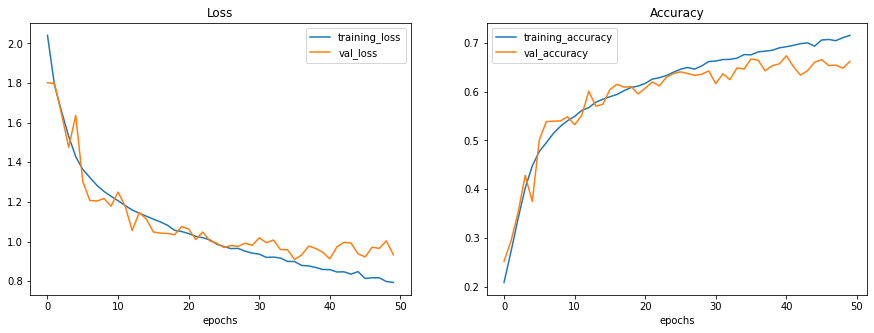

In [14]:
import matplotlib.pyplot as plt
plot_curves(CNN_history)

In [15]:
CNN_Predictions = CNN_Model.predict(test_data)

# Choosing highest probalbilty class in every prediction 
CNN_Predictions = np.argmax(CNN_Predictions, axis=1)

In [16]:
test_data.class_indices



{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

Text(0.5, 1.0, 'CNN Confusion Matrix')

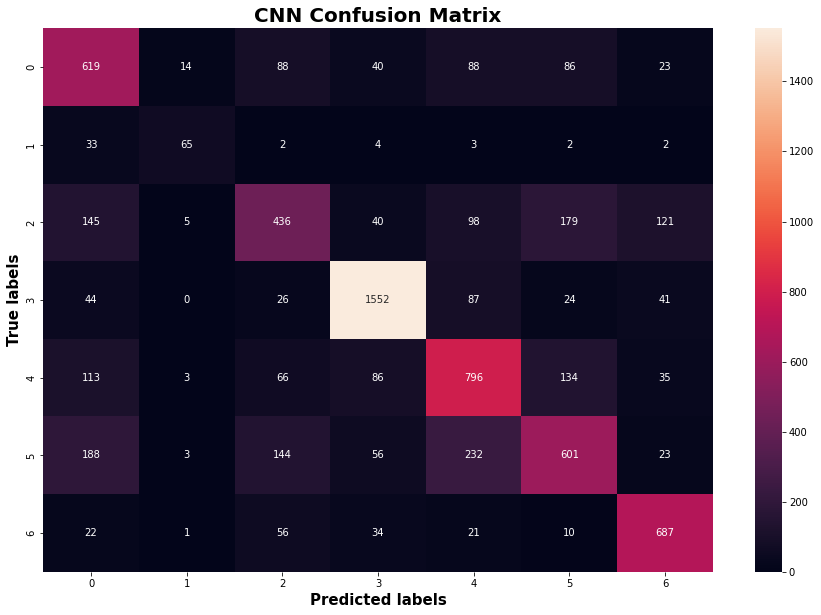

In [17]:
import seaborn as sns 
from sklearn.metrics import confusion_matrix, classification_report

fig, ax= plt.subplots(figsize=(15,10))

cm=confusion_matrix(test_data.labels, CNN_Predictions)

sns.heatmap(cm, annot=True, fmt='g', ax=ax)

ax.set_xlabel('Predicted labels',fontsize=15, fontweight='bold')
ax.set_ylabel('True labels', fontsize=15, fontweight='bold')
ax.set_title('CNN Confusion Matrix', fontsize=20, fontweight='bold')

In [18]:
# Classification Report

report = classification_report(test_data.classes, CNN_Predictions)
print(report)

              precision    recall  f1-score   support

           0       0.53      0.65      0.58       958
           1       0.71      0.59      0.64       111
           2       0.53      0.43      0.47      1024
           3       0.86      0.87      0.87      1774
           4       0.60      0.65      0.62      1233
           5       0.58      0.48      0.53      1247
           6       0.74      0.83      0.78       831

    accuracy                           0.66      7178
   macro avg       0.65      0.64      0.64      7178
weighted avg       0.66      0.66      0.66      7178

